In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)



In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements= base.classes.measurement
Stations= base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

session.query(Measurements.date).order_by(Measurements.date.desc()).first()



('2017-08-23',)

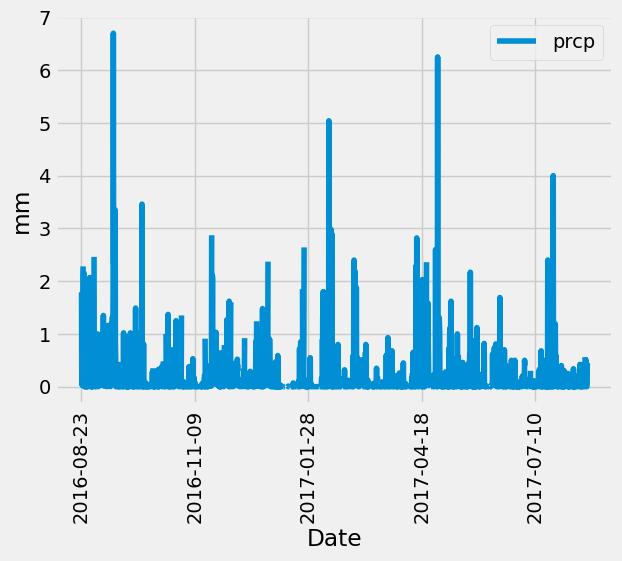

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
#prev_year = Latest_date - dt.timedelta(days=365)
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'prcp'])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.style.use('fivethirtyeight')
df.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("mm")
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics= df['prcp'].describe()
summary_statistics

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(func.distinct(Measurements.station))).scalar()


9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Most_active_station_desc= session.query(Measurements.station, func.count(Measurements.tobs)).\
            group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).all()
Most_active_station_desc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurements.tobs),
       func.max(Measurements.tobs),
       func.avg(Measurements.tobs)]
most_active = session.query(*sel).\
    filter(Measurements.station == "USC00519281").all()
most_active
  

[(54.0, 85.0, 71.66378066378067)]

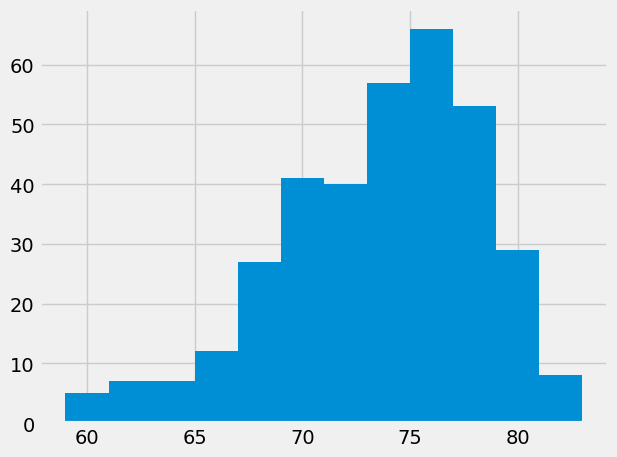

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_stat = session.query(Measurements.date, Measurements.tobs).\
        filter(Measurements.date >= prev_year).filter(Measurements.station == "USC00519281").all()

df_tobs_stat=pd.DataFrame(tobs_stat,columns=['date','tobs'])
plt.hist(df_tobs_stat['tobs'], bins=12)
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()